<a href="https://colab.research.google.com/github/mugekuskon/PenguinsExploratoryDataAnalysis/blob/main/Exploratory_Data_Analysis_on_Penguin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
penguins_size = pd.read_csv('penguins_size.csv', sep=",")

# **1. Scrutinize the dataset**

In [ ]:
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Shape of the data**

In [ ]:
print("Shape is: ", penguins_size.shape)

Shape is:  (344, 7)


In [ ]:
penguins_size.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# **2. Data Cleaning / Finding Missing Values**

In [ ]:
penguins_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

**Imputing**

In [ ]:
penguins_size["culmen_length_mm"] = penguins_size["culmen_length_mm"].fillna(value = penguins_size["culmen_length_mm"].mean())
penguins_size["culmen_depth_mm"] = penguins_size["culmen_depth_mm"].fillna(value = penguins_size["culmen_depth_mm"].mean())
penguins_size["flipper_length_mm"] = penguins_size["flipper_length_mm"].fillna(value = penguins_size["flipper_length_mm"].mean())
penguins_size["body_mass_g"] = penguins_size["body_mass_g"].fillna(value = penguins_size["body_mass_g"].mean())

In [ ]:
penguins_size.value_counts(["sex"])

sex   
MALE      168
FEMALE    165
.           1
dtype: int64

In [ ]:
penguins_size['sex'] = penguins_size['sex'].fillna('MALE')

**Check other missing values**

In [ ]:
penguins_size[penguins_size['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


 **Drop Missing Value**

In [ ]:
penguins_size.drop(axis=0, inplace=True, index=336)

In [ ]:
penguins_size.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Check Duplicates**

In [ ]:
duplicated = penguins_size.duplicated()
print(duplicated.sum())


0


In [ ]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# **3. Statistical Insights**

In [ ]:
print("Shape is: ", penguins_size.shape)

Shape is:  (343, 7)


In [ ]:
penguins_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.920244,17.155400,200.868310,4199.791571
std,5.451506,1.970337,14.014098,799.950869
min,32.100000,13.100000,172.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Categorization of the dataset**

In [ ]:
categorical_features = [col for col in penguins_size.columns if penguins_size[col].dtype=='O']
numerical_features = [col for col in penguins_size.columns if penguins_size[col].dtype!='O']
print("These are the categorical features:",categorical_features)
print()
print("These are the Numerical features:",numerical_features)

These are the categorical features: ['species', 'island', 'sex']

These are the Numerical features: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [ ]:
penguins_size['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

**Calculating means of each category in each features.**

In [ ]:
# Find body mass mean by species.
mean_bodymass = penguins_size.groupby('species')['body_mass_g'].mean()
mean_bodymass

species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5070.542719
Name: body_mass_g, dtype: float64

In [ ]:
# Find culmen_length_mm mean by species.
mean_culmen_length_mm = penguins_size.groupby('species')['culmen_length_mm'].mean()
mean_culmen_length_mm

species
Adelie       38.825144
Chinstrap    48.833824
Gentoo       47.500178
Name: culmen_length_mm, dtype: float64

In [ ]:
# Find flipper_length_mm mean by species.
mean_flipper_length_mm = penguins_size.groupby('species')['flipper_length_mm'].mean()
mean_flipper_length_mm


species
Adelie       190.025758
Chinstrap    195.823529
Gentoo       217.056221
Name: flipper_length_mm, dtype: float64

In [ ]:
# Find culmen_depth_mm mean by species.
mean_culmen_depth_mm = penguins_size.groupby('species')['culmen_depth_mm'].mean()
mean_culmen_depth_mm

species
Adelie       18.338495
Chinstrap    18.420588
Gentoo       14.993912
Name: culmen_depth_mm, dtype: float64

# **4. Data Visualization**

## **Boxplot**

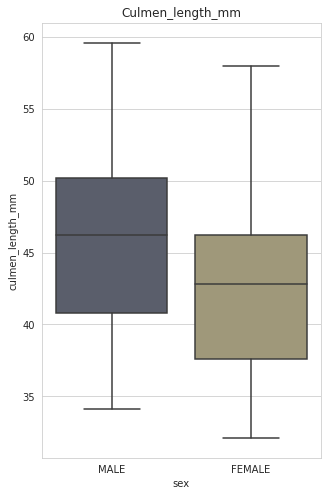

In [ ]:
#Relationship of the culmen length and sex of the penguins. Used to check the outliers and compare the distributions. Line in the center indicates the median of data points.  
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x=penguins_size.sex, y=penguins_size['culmen_length_mm'],orient="v", palette="cividis")
plt.title('Culmen_length_mm')
plt.show()  


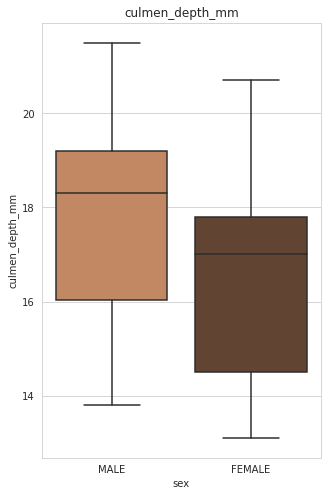

In [ ]:
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x=penguins_size.sex, y=penguins_size['culmen_depth_mm'],orient="v", palette="copper_r")
plt.title('culmen_depth_mm')
plt.show()  

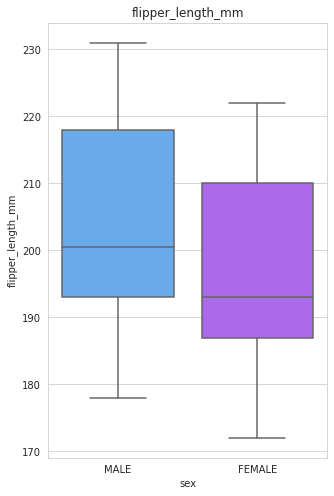

In [ ]:
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x=penguins_size.sex, y=penguins_size['flipper_length_mm'],orient="v", palette="cool")
plt.title('flipper_length_mm')
plt.show()  

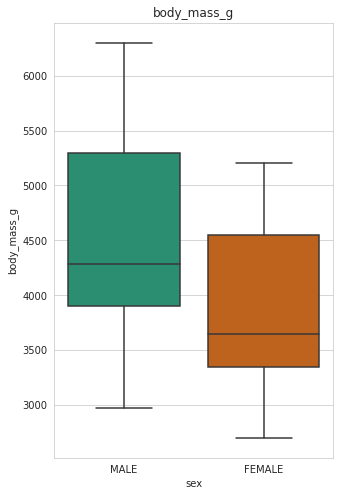

In [ ]:
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x=penguins_size.sex, y=penguins_size['body_mass_g'],orient="v", palette="Dark2")
plt.title('body_mass_g')
plt.show()  

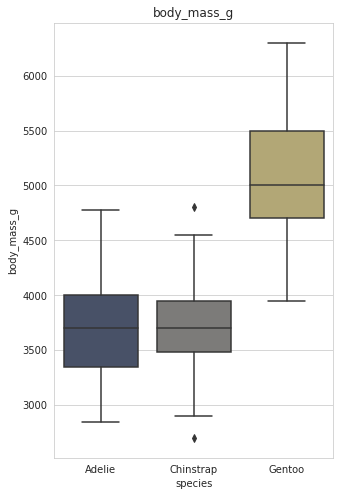

In [ ]:
fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x=penguins_size.species, y=penguins_size['body_mass_g'],orient="v", palette="cividis")
plt.title('body_mass_g')
plt.show()  


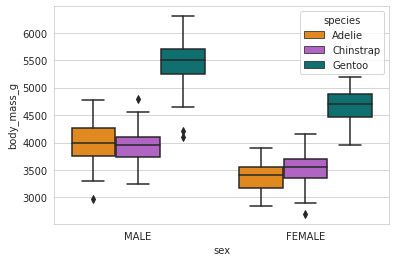

In [ ]:
sns.boxplot(x = penguins_size.sex, y = penguins_size.body_mass_g, hue = penguins_size.species, palette=('DarkOrange', 'MediumOrchid', 'Teal'))

## **Histogram**

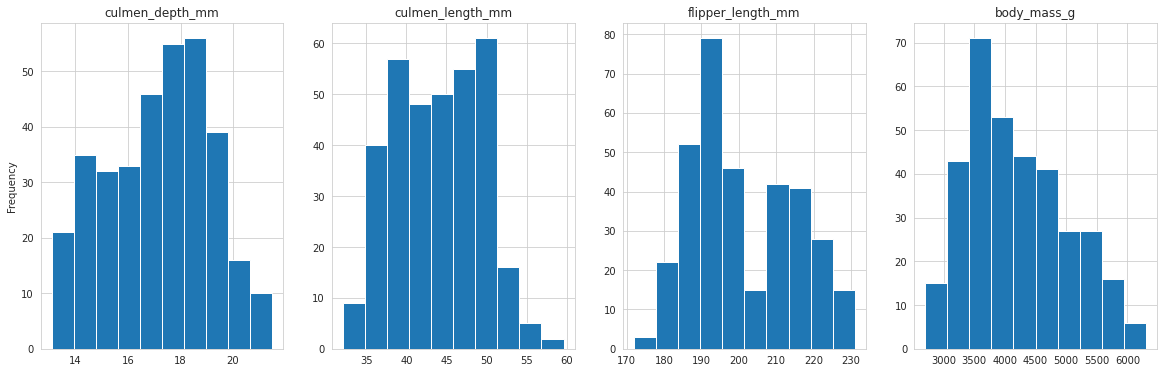

In [ ]:
#Shows us frequency distribution in a simple way.
fig,axs = plt.subplots(1,4,figsize=(20,6))
axs[0].hist(penguins_size.culmen_depth_mm)
axs[0].set_title('culmen_depth_mm')
axs[0].set_ylabel('Frequency')
axs[1].hist(penguins_size.culmen_length_mm)
axs[1].set_title('culmen_length_mm')
axs[2].hist(penguins_size.flipper_length_mm)
axs[2].set_title('flipper_length_mm')
axs[3].hist(penguins_size.body_mass_g)
axs[3].set_title('body_mass_g')


plt.show()

## **Density Plot**

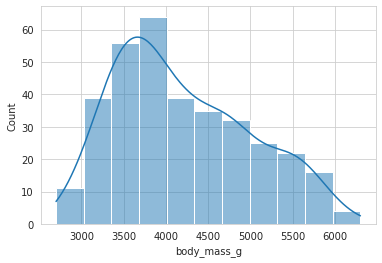

In [ ]:
sns.histplot(penguins_size.body_mass_g,kde=True,thresh=1)
plt.show()

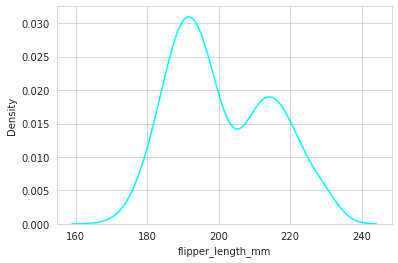

In [ ]:
#used for visualizing the Probability Density of a continuous variable
# user to better analyse the studied probability distribution than when using a traditional histogram.
sns.kdeplot(penguins_size.flipper_length_mm,color='Cyan')
plt.show()

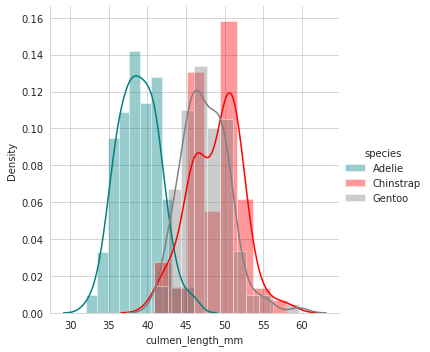

In [ ]:
#FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels
# in identifying the underlying patterns and trends which are not observable just by looking at the data
#Seaborn’s .catplot() method plots the relationship between numerical and one or more categorical variables onto the FacetGrid. 
#Multi-plot grid for plotting conditional relationships.
sns.FacetGrid(penguins_size, hue="species", height=5, palette=('Teal', 'Red', 'Grey')).map(sns.distplot,"culmen_length_mm").add_legend();

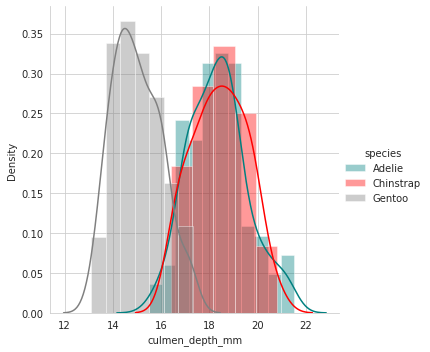

In [ ]:
sns.FacetGrid(penguins_size, hue="species", height=5, palette=('Teal', 'Red', 'Grey')).map(sns.distplot,"culmen_depth_mm").add_legend();

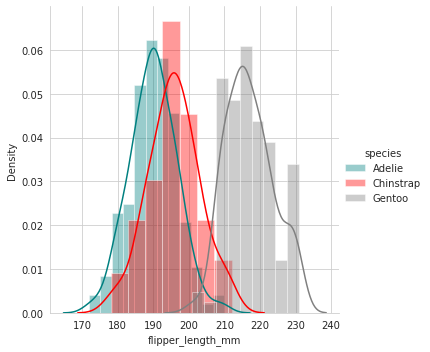

In [ ]:
sns.FacetGrid(penguins_size, hue="species", height=5, palette=('Teal', 'Red', 'Grey')).map(sns.distplot,"flipper_length_mm").add_legend();

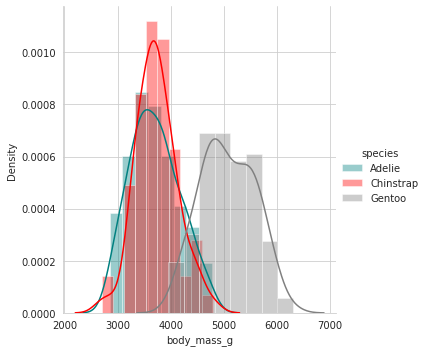

In [ ]:
sns.FacetGrid(penguins_size, hue="species", height=5, palette=('Teal', 'Red', 'Grey')).map(sns.distplot,"body_mass_g").add_legend();

## **Barplot**

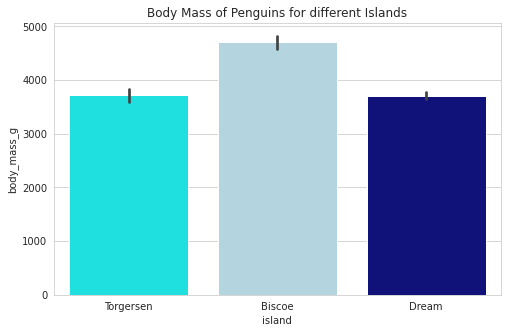

In [ ]:

plt.figure(figsize=(8,5))
colors=["cyan","lightblue", "darkblue"]
sns.barplot(x=penguins_size['island'],y=penguins_size['body_mass_g'], palette=colors)
plt.title('Body Mass of Penguins for different Islands')
plt.show()

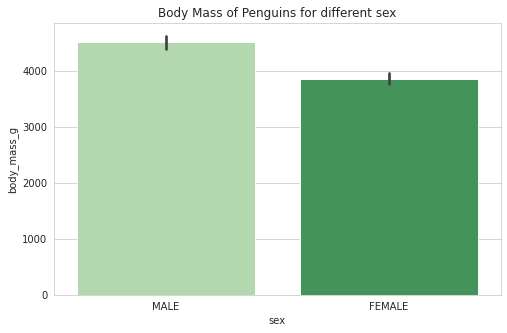

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=penguins_size['sex'],y=penguins_size['body_mass_g'], palette="Greens")
plt.title('Body Mass of Penguins for different sex')
plt.show()

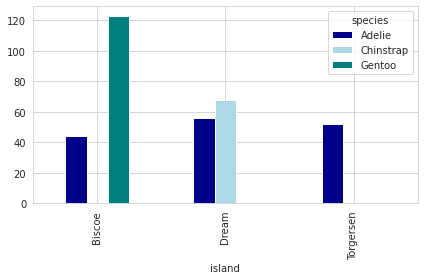

In [ ]:
pd.crosstab(penguins_size['island'], penguins_size['species']).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

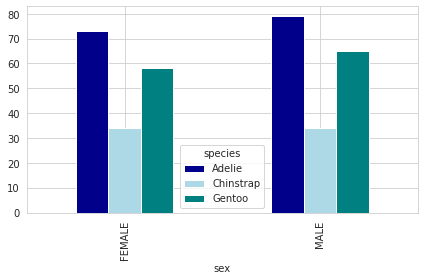

In [ ]:
pd.crosstab(penguins_size['sex'], penguins_size['species']).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

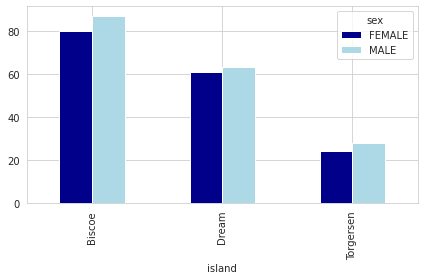

In [ ]:
pd.crosstab(penguins_size['island'], penguins_size['sex']).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

## **Count Plot**

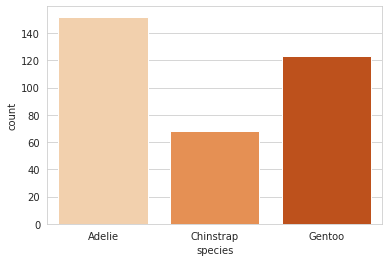

In [ ]:

sns.countplot('species',data=penguins_size, palette= "Oranges")
plt.show()

In [ ]:
penguins_size['island'].value_counts()

Biscoe       167
Dream        124
Torgersen     52
Name: island, dtype: int64

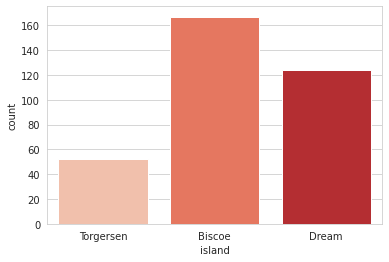

In [ ]:
sns.countplot(x = "island", data = penguins_size, palette="Reds")

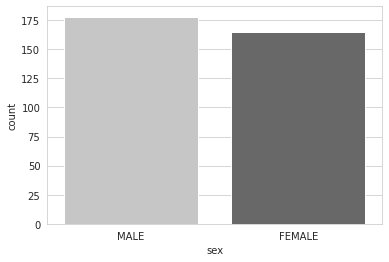

In [ ]:
sns.countplot(x = "sex", data = penguins_size, palette="Greys")

## **Violin Plot**

Text(0.5, 1.0, 'Violin plot')

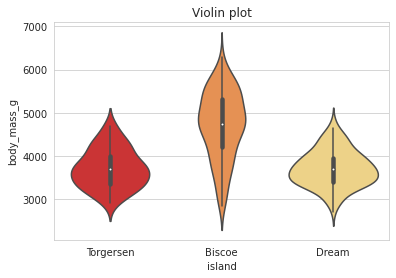

In [ ]:
sns.violinplot(x='island',y='body_mass_g',data=penguins_size, palette="YlOrRd_r")
plt.title('Violin plot')


Text(0.5, 1.0, 'Violin plot')

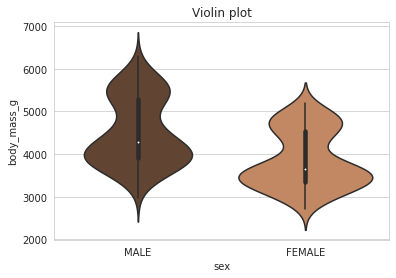

In [ ]:
sns.violinplot(x='sex',y='body_mass_g',data=penguins_size, palette="copper")
plt.title('Violin plot')

Text(0.5, 1.0, 'Violin plot')

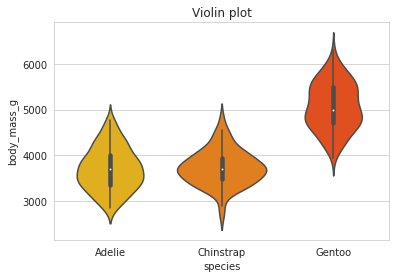

In [ ]:
sns.violinplot(x='species',y='body_mass_g',data=penguins_size, palette="autumn_r")
plt.title('Violin plot')

## **Strip Plot**

Text(0.5, 1.0, 'Strip plot')

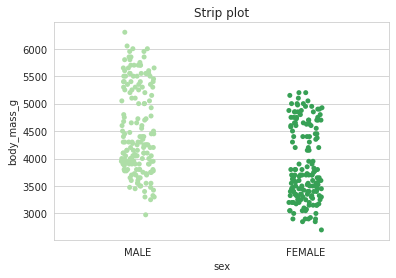

In [ ]:

sns.stripplot(x='sex',y='body_mass_g',data=penguins_size, palette="Greens")
plt.title('Strip plot')

Text(0.5, 1.0, 'Strip plot')

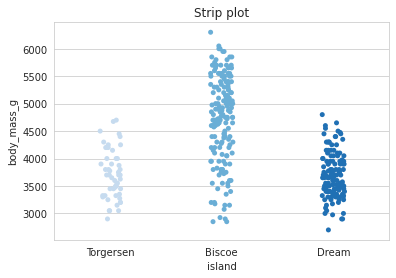

In [ ]:
sns.stripplot(x='island',y='body_mass_g',data=penguins_size, palette="Blues")
plt.title('Strip plot')

Text(0.5, 1.0, 'Strip plot')

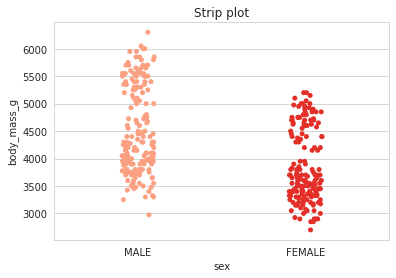

In [ ]:
sns.stripplot(x='sex',y='body_mass_g',data=penguins_size, palette="Reds")
plt.title('Strip plot')

## **Swarm Plot**

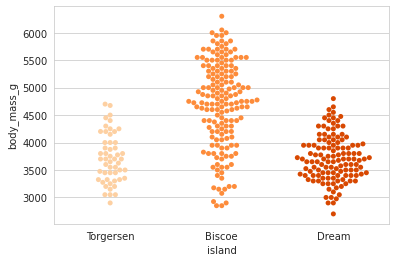

In [ ]:
sns.swarmplot(x ='island',y='body_mass_g',data=penguins_size, palette="Oranges")
plt.show()

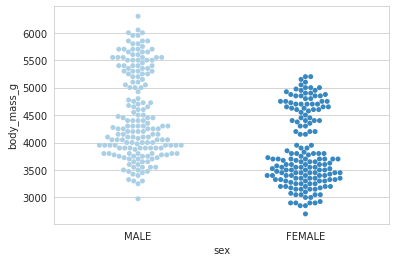

In [ ]:
sns.swarmplot(x ='sex',y='body_mass_g',data=penguins_size, palette="Blues")
plt.show()

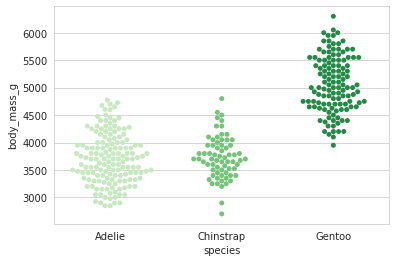

In [ ]:
sns.swarmplot(x ='species',y='body_mass_g',data=penguins_size, palette="Greens")
plt.show()

## **Pair Plot**

<Figure size 504x504 with 0 Axes>

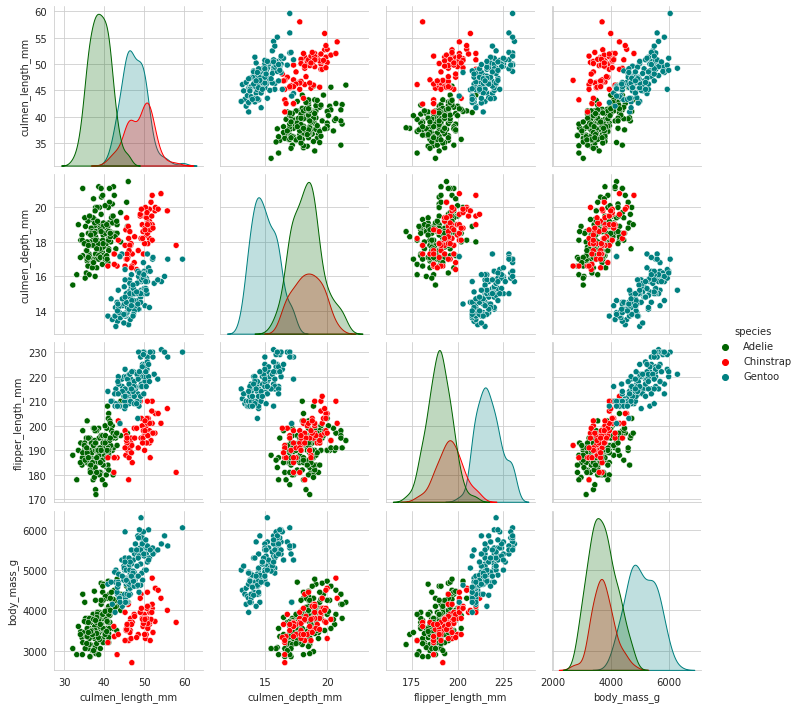

In [ ]:

plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=penguins_size, hue='species', palette=('DarkGreen', 'Red', 'Teal'))

## **Categorical Plot**

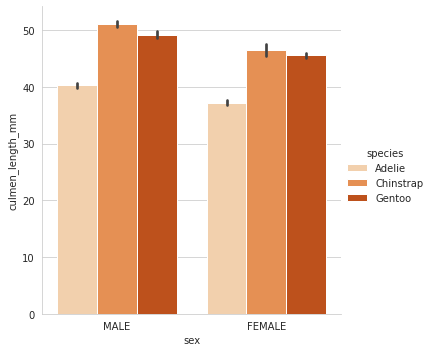

In [ ]:
sns.catplot(x="sex", y="culmen_length_mm", hue="species", data=penguins_size, kind="bar", palette="Oranges")

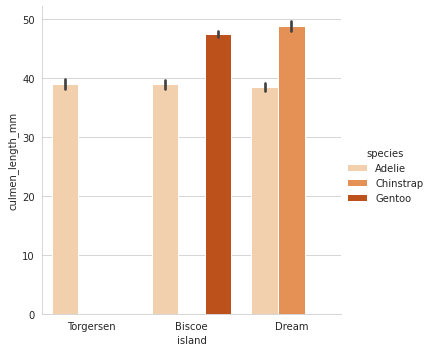

In [ ]:
sns.catplot(x="island", y="culmen_length_mm", hue="species", data=penguins_size, kind="bar", palette="Oranges")

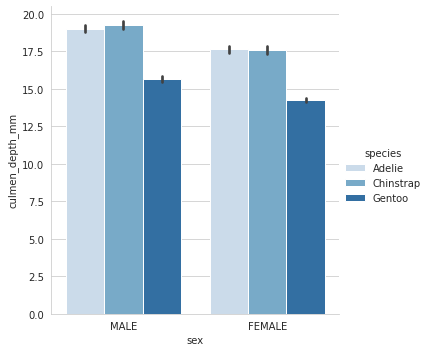

In [ ]:
sns.catplot(x="sex", y="culmen_depth_mm", hue="species", data=penguins_size, kind="bar", palette="Blues")

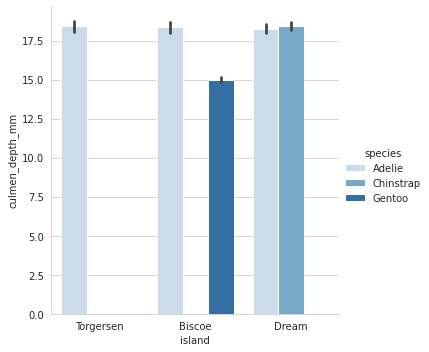

In [ ]:
sns.catplot(x="island", y="culmen_depth_mm", hue="species", data=penguins_size, kind="bar", palette="Blues")

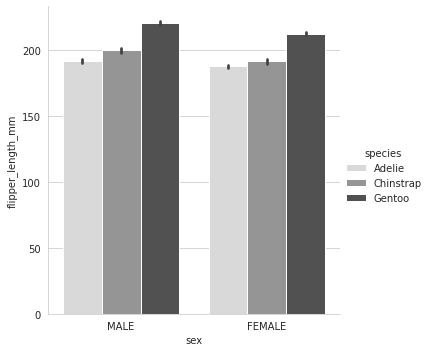

In [ ]:
sns.catplot(x="sex", y="flipper_length_mm", hue="species", data=penguins_size, kind="bar", palette="Greys")

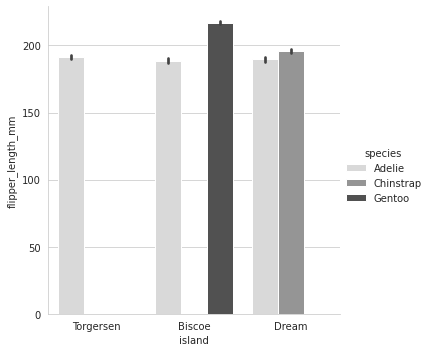

In [ ]:
sns.catplot(x="island", y="flipper_length_mm", hue="species", data=penguins_size, kind="bar", palette="Greys")

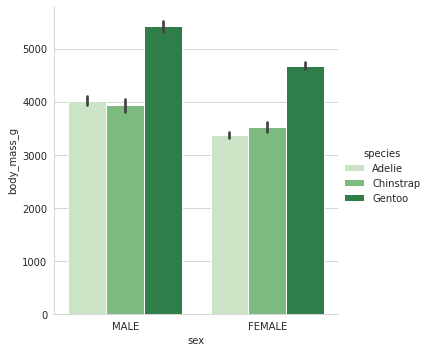

In [ ]:
sns.catplot(x="sex", y="body_mass_g", hue="species", data=penguins_size, kind="bar", palette="Greens")

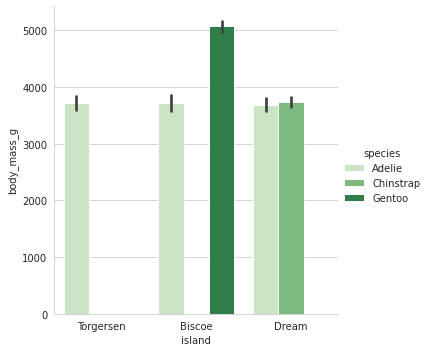

In [ ]:
sns.catplot(x="island", y="body_mass_g", hue="species", data=penguins_size, kind="bar", palette="Greens")

## **Scatter Plot**

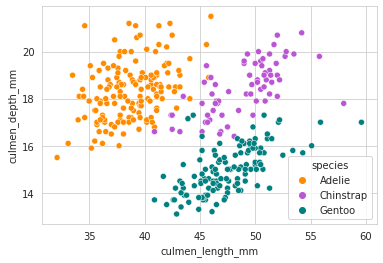

In [ ]:
#Scatter Plot is used to show the relation between two features. 

sns.scatterplot(x = penguins_size.culmen_length_mm, y = penguins_size.culmen_depth_mm, hue = penguins_size.species, palette=('DarkOrange', 'MediumOrchid', 'Teal'))

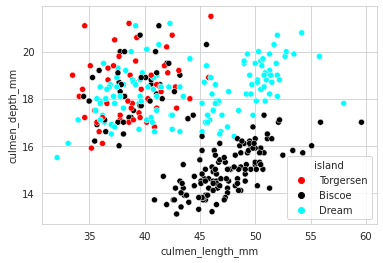

In [ ]:

sns.scatterplot(x = penguins_size.culmen_length_mm, y = penguins_size.culmen_depth_mm, hue = penguins_size.island, palette=('Red', 'Black', 'Cyan'))

## **Correlation Matrix**

In [ ]:
corr = penguins_size.corr()
corr

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


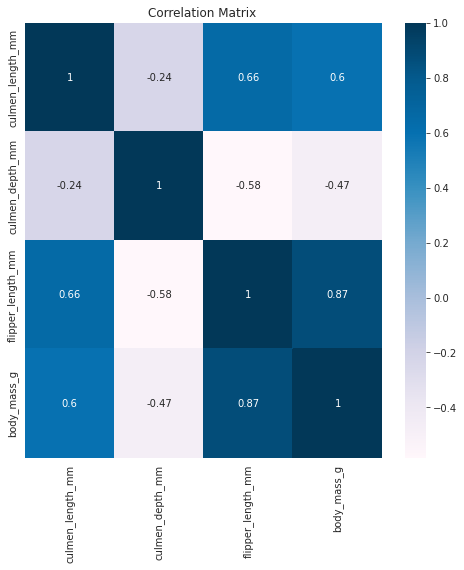

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="PuBu")
plt.title('Correlation Matrix ')
plt.show()

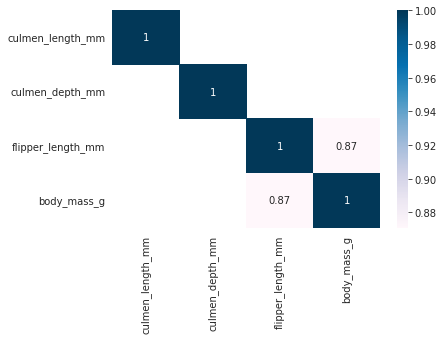

In [ ]:
sns.heatmap(corr[(corr>0.8)],annot=True, cmap="PuBu")